# Loading libraries to load data set

**Loading libraries**

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#checking if GPU is working or not
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2729413518622097678,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3048682292
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5575868940052040762
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [5]:
%config Completer.use_jedi = False

**Loading data**

In [6]:
data = pd.read_csv('train_news.csv')
data.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [7]:
#removing Unnamed: 0, id columns as these are not required
data.drop(['Unnamed: 0','id'],axis=1,inplace=True)
data.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

**Checking info and shape of our data set**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   headline    20242 non-null  object
 1   written_by  18843 non-null  object
 2   news        20761 non-null  object
 3   label       20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [9]:
data.shape

(20800, 4)

There are 20800 observations/ news in our data set.
We can see that there are missing values on our data set, we will check the exact number of missing values below. Except label/ target variable all independent variables are of object type.

### Checking and droping duplicates

In [10]:
dupli_data = data[data.duplicated()]
dupli_data.shape

(109, 4)

In [11]:
dupli_data.head()

headline          written_by  \
1818  JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN ...                 NaN   
2031                                                NaN           Anonymous   
2626                                                NaN           Enjoykin4   
4546                                                NaN           Anonymous   
5016  The U.S./Turkey Plan For “Seizing, Holding, An...  Brandon Turbeville   

                                                   news  label  
1818  The Corruption of the Clinton’s is like an end...      1  
2031  Same people all the time , i dont know how you...      1  
2626  A leading US senator: US Supporting War in Syr...      1  
4546  Same people all the time , i dont know how you...      1  
5016  By Brandon Turbeville As the U.S. Presidential...      1

In [12]:
data[data['headline']=='JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN TO BRIBE FBI AGENTS TO LET HER GO']

headline written_by  \
1299  JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN ...        NaN   
1818  JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN ...        NaN   

                                                   news  label  
1299  The Corruption of the Clinton’s is like an end...      1  
1818  The Corruption of the Clinton’s is like an end...      1

In [13]:
data.drop_duplicates(inplace=True,keep='first',ignore_index=True)

In [14]:
data.shape

(20691, 4)

In [15]:
data['headline'][1299]

'JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN TO BRIBE FBI AGENTS TO LET HER GO'

**Checking missing values on our data set**

In [16]:
missing_data = data.isnull().sum()
missing_data

headline       518
written_by    1932
news            39
label            0
dtype: int64

<AxesSubplot:>

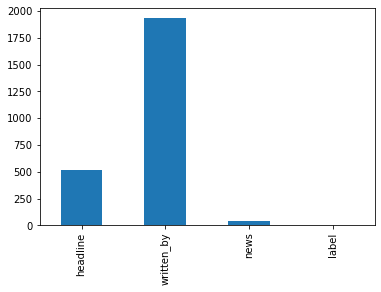

In [17]:
missing_data.plot(kind='bar')

We can see that news written by has many missing values. There are missing values in headline and news as well.

In [18]:
#checking number of unique values in each column
for i in data.columns:
    if i == "written_by" or i == "label":
        print("number of unique values in {} are {}".format(i,data[i].nunique()))

number of unique values in written_by are 4201
number of unique values in label are 2


There are 4201 authors who wrote the news and there are 2 values for target class (1 = fake and 0 = not fake)

### Checking missing values in the data belonging to seperate class

In [19]:
#here I have created seperate data for each label 1 and 0

fake_data = data[data['label']==1]
non_fake_data = data[data['label']==0]

In [20]:
fake_data.isnull().sum()

headline       518
written_by    1906
news            39
label            0
dtype: int64

In [21]:
non_fake_data.isnull().sum()

headline       0
written_by    26
news           0
label          0
dtype: int64

**Here I observed that for non_fake news there are only 26 observation in written_by column are missing. Most of the data are missing from fake news**

In [22]:
#I will check the number/ value_counts of the authors for both fake and nonfake news
fake_auth = data[data['label']==1]['written_by']
fake_auth.value_counts()[:10]

admin                                    192
Eddy Lavine                               85
Pakalert                                  85
Starkman                                  84
Gillian                                   82
Alex Ansary                               82
Editor                                    81
noreply@blogger.com (Alexander Light)     80
Dave Hodges                               77
IWB                                       75
Name: written_by, dtype: int64

In [23]:
real_auth = data[data['label']==0]['written_by']
real_auth.value_counts()[:10]

Pam Key                242
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Warner Todd Huston     122
Ian Hanchett           119
Breitbart News         118
Daniel Nussbaum        112
AWR Hawkins            107
Name: written_by, dtype: int64

**Here my observation is that, for each news where there is no author and headline are classified as fake. The reason could be that with no author the source of the news cannot be confirmed. Also same with headlines , A perfect news will always have these 2 things**

In [24]:
#showing the missing values visually
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'total number of missing data from non fake news'}>

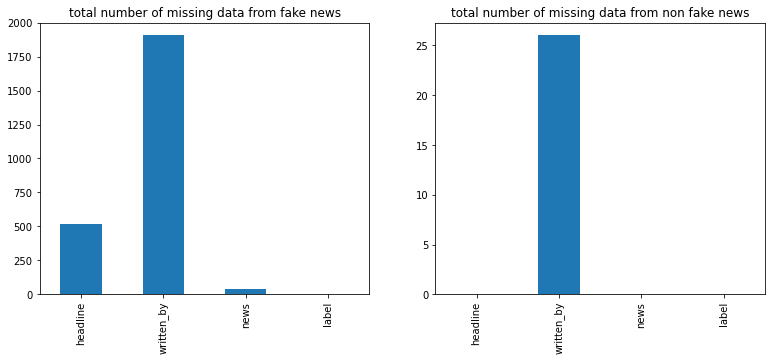

In [25]:
figure, axes = plt.subplots(1, 2,figsize=(13,5))
fake_data.isnull().sum().plot(ax=axes[0],kind='bar',title='total number of missing data from fake news')
non_fake_data.isnull().sum().plot(ax=axes[1],kind='bar',title='total number of missing data from non fake news')

In [26]:
# I will replace missing values for data belonging to fake news as not available and will drop the missing data
# belonging to non fake news.

fake_data.fillna('na',inplace=True)
fake_data.head()

headline         written_by  \
4                       A Digital 9/11 If Trump Wins  Finian Cunningham   
5  Whatever the Outcome on November 8th the US Wi...                 na   
7  Alabama Prison Officials Retaliate Against Pri...   Brian Sonenstein   
8                                                 na        steventexas   
9           Can We Live in a Constant State of Love?            Gillian   

                                                news  label  
4    Finian Cunningham has written extensively on...      1  
5  Taming the corporate media beast Whatever the ...      1  
7  Advocates say prison officials at the Kilby Co...      1  
8  People have made up their minds on president.\...      1  
9  Leave a reply \nToni Emerson – When we fall in...      1

In [27]:
non_fake_data.dropna(inplace=True)

In [28]:
imputed_data = pd.concat([fake_data,non_fake_data],axis=0,ignore_index=True)
imputed_data.shape

(20665, 4)

In [29]:
imputed_data.isnull().sum()

headline      0
written_by    0
news          0
label         0
dtype: int64

In [30]:
imputed_data.head()

headline         written_by  \
0                       A Digital 9/11 If Trump Wins  Finian Cunningham   
1  Whatever the Outcome on November 8th the US Wi...                 na   
2  Alabama Prison Officials Retaliate Against Pri...   Brian Sonenstein   
3                                                 na        steventexas   
4           Can We Live in a Constant State of Love?            Gillian   

                                                news  label  
0    Finian Cunningham has written extensively on...      1  
1  Taming the corporate media beast Whatever the ...      1  
2  Advocates say prison officials at the Kilby Co...      1  
3  People have made up their minds on president.\...      1  
4  Leave a reply \nToni Emerson – When we fall in...      1

### Checking label distribution

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(imputed_data['label'])
plt.title('distribution of class')
plt.xlabel('0 = non fake                        1 = fake')
plt.ylabel('count')
plt.show()

**Here we can see that our data is almost balanced**

### Punctuation cleaning

In [32]:
import re,string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [33]:
lemmatizer = WordNetLemmatizer()

In [34]:
#Creating a copy 
clean_news=imputed_data.copy()

In [35]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
       
    return text



In [36]:
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news['headline']=clean_news['headline'].apply(lambda x:review_cleaning(x))
clean_news['written_by']=clean_news['written_by'].apply(lambda x:review_cleaning(x))

In [37]:
clean_news.head()

headline         written_by  \
0                           a digital  if trump wins  finian cunningham   
1  whatever the outcome on november  the us will ...                 na   
2  alabama prison officials retaliate against pri...   brian sonenstein   
3                                                 na        steventexas   
4            can we live in a constant state of love            gillian   

                                                news  label  
0    finian cunningham has written extensively on...      1  
1  taming the corporate media beast whatever the ...      1  
2  advocates say prison officials at the kilby co...      1  
3  people have made up their minds on presidenti’...      1  
4  leave a reply toni emerson – when we fall in l...      1

### Removing stop words

In [38]:
import nltk
from nltk.corpus import stopwords

In [39]:
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news['headline'] = clean_news['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news['written_by'] = clean_news['written_by'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [40]:
clean_news.head()

headline         written_by  \
0                                 digital trump wins  finian cunningham   
1  whatever outcome november us collision course ...                 na   
2  alabama prison officials retaliate prison stri...   brian sonenstein   
3                                                 na        steventexas   
4                           live constant state love            gillian   

                                                news  label  
0  finian cunningham written extensively internat...      1  
1  taming corporate media beast whatever outcome ...      1  
2  advocates say prison officials kilby correctio...      1  
3  people made minds presidenti’ve served elected...      1  
4  leave reply toni emerson – fall love heart bec...      1

### Lemmatizing 

In [41]:
lemmatizer = WordNetLemmatizer()

def preprocess_data(data):

    #this lowers the alphabets
    data = data.str.lower()

    #replacing the trailing white spaces
    data = data.replace('  ', '')

    #lemmatizing words
    data = data.apply(lambda x: ' '.join(
            lemmatizer.lemmatize(word) for word in word_tokenize(x)))

    return data

In [42]:
clean_news['clean_news'] = preprocess_data(clean_news['news'])

In [43]:
clean_news['clean_headline'] = preprocess_data(clean_news['headline'])

In [44]:
clean_news.head()

headline         written_by  \
0                                 digital trump wins  finian cunningham   
1  whatever outcome november us collision course ...                 na   
2  alabama prison officials retaliate prison stri...   brian sonenstein   
3                                                 na        steventexas   
4                           live constant state love            gillian   

                                                news  label  \
0  finian cunningham written extensively internat...      1   
1  taming corporate media beast whatever outcome ...      1   
2  advocates say prison officials kilby correctio...      1   
3  people made minds presidenti’ve served elected...      1   
4  leave reply toni emerson – fall love heart bec...      1   

                                          clean_news  \
0  finian cunningham written extensively internat...   
1  taming corporate medium beast whatever outcome...   
2  advocate say prison official kilby correctiona...   
3  people made mind presidenti ’ ve served electe...   
4  leave reply toni emerson – fall love heart bec...   

                                      clean_headline  
0                                  digital trump win  
1  whatever outcome november u collision course c...  
2  alabama prison official retaliate prison strik...  
3                                                 na  
4                           live constant state love

In [45]:
clean_news.to_csv('clean_news.csv')

In [46]:
imputed_data.head()

headline         written_by  \
0                       A Digital 9/11 If Trump Wins  Finian Cunningham   
1  Whatever the Outcome on November 8th the US Wi...                 na   
2  Alabama Prison Officials Retaliate Against Pri...   Brian Sonenstein   
3                                                 na        steventexas   
4           Can We Live in a Constant State of Love?            Gillian   

                                                news  label  
0    Finian Cunningham has written extensively on...      1  
1  Taming the corporate media beast Whatever the ...      1  
2  Advocates say prison officials at the Kilby Co...      1  
3  People have made up their minds on president.\...      1  
4  Leave a reply \nToni Emerson – When we fall in...      1

In [47]:
clean_news.head()

headline         written_by  \
0                                 digital trump wins  finian cunningham   
1  whatever outcome november us collision course ...                 na   
2  alabama prison officials retaliate prison stri...   brian sonenstein   
3                                                 na        steventexas   
4                           live constant state love            gillian   

                                                news  label  \
0  finian cunningham written extensively internat...      1   
1  taming corporate media beast whatever outcome ...      1   
2  advocates say prison officials kilby correctio...      1   
3  people made minds presidenti’ve served elected...      1   
4  leave reply toni emerson – fall love heart bec...      1   

                                          clean_news  \
0  finian cunningham written extensively internat...   
1  taming corporate medium beast whatever outcome...   
2  advocate say prison official kilby correctiona...   
3  people made mind presidenti ’ ve served electe...   
4  leave reply toni emerson – fall love heart bec...   

                                      clean_headline  
0                                  digital trump win  
1  whatever outcome november u collision course c...  
2  alabama prison official retaliate prison strik...  
3                                                 na  
4                           live constant state love

### Checking the word counts difference in both cleaned and non-cleaned data

In [48]:
imputed_data_headline_words_count = []
imputed_data_news_words_count = []

In [49]:
for i in range(len(imputed_data)):
    imputed_data_headline_words_count.append(len(imputed_data['headline'][i].split()))

In [50]:
for i in range(len(imputed_data)):
    imputed_data_news_words_count.append(len(imputed_data['news'][i].split()))

In [51]:
imputed_data['headlines_word_count'] = pd.Series(imputed_data_headline_words_count)
imputed_data['news_word_count'] = pd.Series(imputed_data_news_words_count)

In [52]:
imputed_data.head()

headline         written_by  \
0                       A Digital 9/11 If Trump Wins  Finian Cunningham   
1  Whatever the Outcome on November 8th the US Wi...                 na   
2  Alabama Prison Officials Retaliate Against Pri...   Brian Sonenstein   
3                                                 na        steventexas   
4           Can We Live in a Constant State of Love?            Gillian   

                                                news  label  \
0    Finian Cunningham has written extensively on...      1   
1  Taming the corporate media beast Whatever the ...      1   
2  Advocates say prison officials at the Kilby Co...      1   
3  People have made up their minds on president.\...      1   
4  Leave a reply \nToni Emerson – When we fall in...      1   

   headlines_word_count  news_word_count  
0                     6             1442  
1                    19             2539  
2                    13             1048  
3                     1              131  
4                     9             1069

In [53]:
clean_data_headline_word_count = []
clean_data_news_word_count = []

In [54]:
for i in range(len(clean_news)):
    clean_data_headline_word_count.append(len(clean_news['clean_headline'][i].split()))
    
for i in range(len(clean_news)):
    clean_data_news_word_count.append(len(clean_news['clean_news'][i].split()))

In [55]:
clean_news['headlines_word_count'] = pd.Series(clean_data_headline_word_count)
clean_news['news_word_count'] = pd.Series(clean_data_news_word_count)

In [56]:
clean_news.head()

headline         written_by  \
0                                 digital trump wins  finian cunningham   
1  whatever outcome november us collision course ...                 na   
2  alabama prison officials retaliate prison stri...   brian sonenstein   
3                                                 na        steventexas   
4                           live constant state love            gillian   

                                                news  label  \
0  finian cunningham written extensively internat...      1   
1  taming corporate media beast whatever outcome ...      1   
2  advocates say prison officials kilby correctio...      1   
3  people made minds presidenti’ve served elected...      1   
4  leave reply toni emerson – fall love heart bec...      1   

                                          clean_news  \
0  finian cunningham written extensively internat...   
1  taming corporate medium beast whatever outcome...   
2  advocate say prison official kilby correctiona...   
3  people made mind presidenti ’ ve served electe...   
4  leave reply toni emerson – fall love heart bec...   

                                      clean_headline  headlines_word_count  \
0                                  digital trump win                     3   
1  whatever outcome november u collision course c...                     9   
2  alabama prison official retaliate prison strik...                    10   
3                                                 na                     1   
4                           live constant state love                     4   

   news_word_count  
0              917  
1             1369  
2              724  
3               81  
4              608

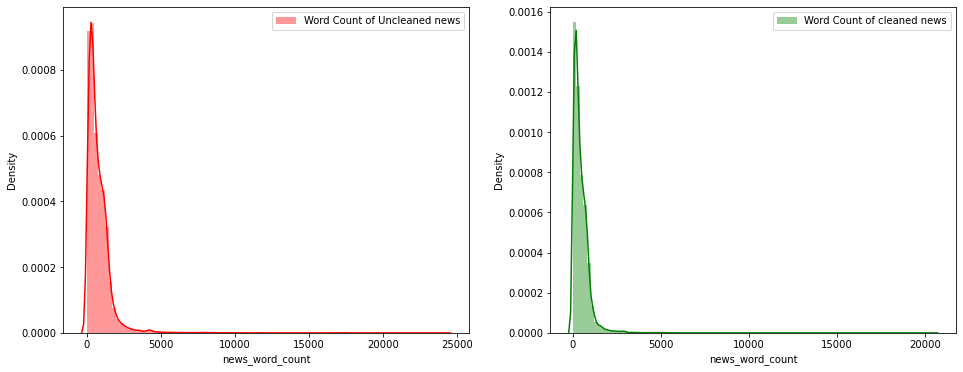

In [57]:
# Visualizing the spread of word count before and after cleaning
fig, ax = plt.subplots(1,2, figsize = (16, 6))

sns.distplot(imputed_data['news_word_count'],color = 'r', ax = ax[0], bins = 100, label= 'Word Count of Uncleaned news')
ax[0].legend();

sns.distplot(clean_news['news_word_count'], color = 'g', ax = ax[1], bins = 100, label = 'Word Count of cleaned news')
ax[1].legend();

### Wordcloud visualisation of real and fake news (clean data)

In [58]:
from wordcloud import WordCloud

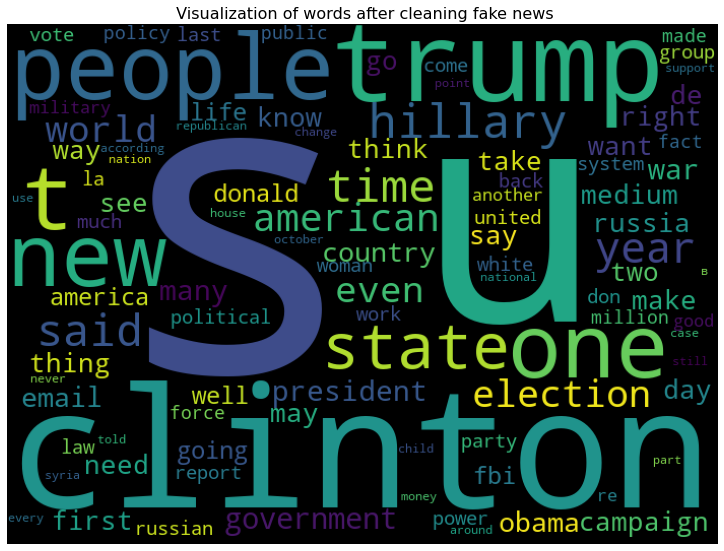

In [59]:
#wordcloud of fake news

fake_af = clean_news['clean_news'][clean_news['label'] == 1]
news1 = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(fake_af))
plt.figure(figsize = (15,8))
plt.imshow(news1)
plt.title(' Visualization of words after cleaning fake news', fontsize = 16)
plt.tight_layout()
plt.axis('off');

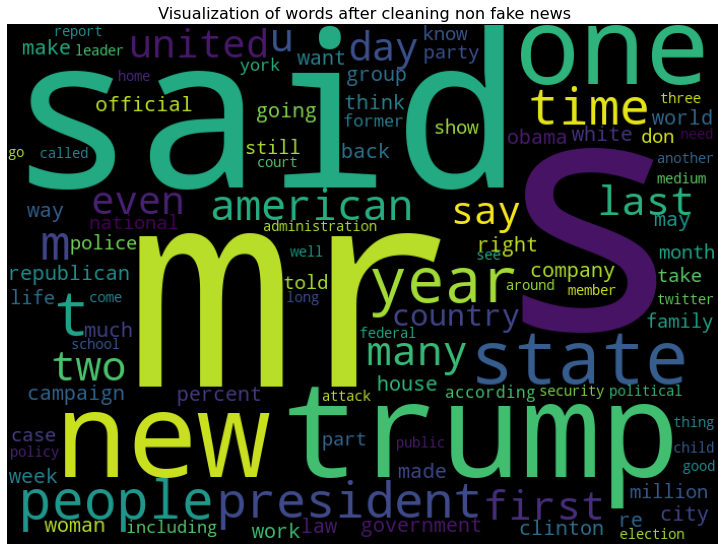

In [75]:
#word cloud of non-fake news

non_fake = clean_news['clean_news'][clean_news['label'] == 0]
news2 = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(non_fake))
plt.figure(figsize = (15,8))
plt.imshow(news2)
plt.title(' Visualization of words after cleaning non fake news', fontsize = 16)
plt.tight_layout()
plt.axis('off');

In [61]:
final_data = clean_news[['clean_news','clean_headline','label']]
final_data.head()

clean_news  \
0  finian cunningham written extensively internat...   
1  taming corporate medium beast whatever outcome...   
2  advocate say prison official kilby correctiona...   
3  people made mind presidenti ’ ve served electe...   
4  leave reply toni emerson – fall love heart bec...   

                                      clean_headline  label  
0                                  digital trump win      1  
1  whatever outcome november u collision course c...      1  
2  alabama prison official retaliate prison strik...      1  
3                                                 na      1  
4                           live constant state love      1

In [62]:
final_data.to_csv('final_data.csv')

In [63]:
final_data.isnull().sum()

clean_news        0
clean_headline    0
label             0
dtype: int64

In [64]:
final_data.shape

(20665, 3)

### Training model using simple LSTM neural network

In [65]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore')

In [66]:
#merging news and headlines and then spliting the data into input and output
X = final_data['clean_news'] + '  ' + final_data['clean_headline']
y = final_data['label']

In [67]:
#maximum length in train dataset 
max_length = X.map(lambda x: len(x.split())).max()
max_length 

20509

In [68]:
vocab_size = 20000

#fit tokenizer
tok = Tokenizer(num_words = vocab_size)
tok.fit_on_texts(X)

#tokenize data
X = tok.texts_to_sequences(X)

#Pad data
X = pad_sequences(X, maxlen = max_length, padding= 'pre' )

In [67]:
#defining neural network including embedding and LSTM

model = Sequential([
    Embedding(vocab_size, output_dim = 100, input_length = max_length ),  #using word embedding
    LSTM(units = 128),         #LSTM layer
    Dense(units = 1, activation = 'sigmoid')   #output layer
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20509, 100)        2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,117,377
Trainable params: 2,117,377
Non-trainable params: 0
_________________________________________________________________


In [69]:
import numpy as np
X = np.array(X)
y = np.array(y)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [71]:
#fitting the model

model.fit(X_train,
         y_train,
         epochs = 5,
         validation_data= (X_test, y_test),
         batch_size = 20,
         verbose = 1)

Epoch 1/5
827/827 [==============================] - 932s 1s/step - loss: 0.2496 - accuracy: 0.9061 - val_loss: 0.0654 - val_accuracy: 0.9787
Epoch 2/5
827/827 [==============================] - 919s 1s/step - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.0686 - val_accuracy: 0.9787
Epoch 3/5
827/827 [==============================] - 922s 1s/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0859 - val_accuracy: 0.9773
Epoch 4/5
827/827 [==============================] - 940s 1s/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.1015 - val_accuracy: 0.9794
Epoch 5/5
827/827 [==============================] - 976s 1s/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.1171 - val_accuracy: 0.9659


**Here we can see that pur model was training well, however it seems that the number of epochs should be more. With the above results I am good to go with this model.**

In [73]:
y_pred = (model.predict(X_test)>= 0.5).astype('int')

In [74]:
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
print("Classification report of our model : \n", classification_report(y_test,y_pred))

Classification report of our model : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2092
           1       0.98      0.95      0.97      2041

    accuracy                           0.97      4133
   macro avg       0.97      0.97      0.97      4133
weighted avg       0.97      0.97      0.97      4133



In [76]:
print("Confusion matrix of our model : \n", confusion_matrix(y_test,y_pred))

Confusion matrix of our model : 
 [[2047   45]
 [  96 1945]]
